## CiFAR 이미지 분류 모델 구현
- 데이터 : CiFAR10 https://www.cs.toronto.edu/~kriz/cifar.html
- 학습 방법 : 10가지 이미지 종류 분류 => 다중분류
- 이미지 : DNN(MLP), CNN

In [46]:
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.datasets.cifar10 import load_data
import numpy as np
import matplotlib.pyplot as plt

In [78]:
# W,b 고정하도록 seed 설정
set_random_seed(11)

---
### [1] 데이터 로딩 및 준비

In [79]:
(x_train, y_train), (x_test, y_test) = load_data()

In [80]:
print(f'x_train.shape : {x_train.shape}, y_train.shape : {y_train.shape}')
print(f'x_test.shape : {x_test.shape}, y_train.shape : {y_test.shape}')

x_train.shape : (50000, 32, 32, 3), y_train.shape : (50000, 1)
x_test.shape : (10000, 32, 32, 3), y_train.shape : (10000, 1)


---
## [2] 데이터 전처리 및 학습형태로 변환

In [81]:
# 스케일링 => 픽셀 / 255.0
x_train=x_train/255.0
x_test=x_test/255.0

In [82]:
# Conv 레이어는 이미지의 채널 정보까지 입력
x_train=x_train.reshape(-1, 32, 32, 3)
x_test=x_test.reshape(-1, 32, 32, 3)

In [83]:
# 검증용 데이터 준비
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, stratify=y_train, random_state=11, test_size=0.2)

In [84]:
print(f'x_train.shape : {x_train.shape}')
print(f'x_val.shape : {x_val.shape}')
print(f'y_train.shape : {y_train.shape}')
print(f'y_val.shape : {y_val.shape}')

x_train.shape : (40000, 32, 32, 3)
x_val.shape : (10000, 32, 32, 3)
y_train.shape : (40000, 1)
y_val.shape : (10000, 1)


---
## [3-1] 모델 구성

In [85]:
model=Sequential()

In [86]:
# 이미지 특징 추출 Layer => 첫번째 입력값 설정
model.add(Conv2D(2, kernel_size=3, padding='same', input_shape=(32,32,3)))

In [87]:
# 이미지 특징 다른 샘플링 Layer => MaxPool2D
model.add(MaxPool2D())

In [88]:
# 1차원으로 데이터 형태 변환 Layer => Flatten
model.add(Flatten())

In [89]:
# 출력층 => Node : 10개(0~9), activation : softmax
model.add(Dense(10, activation='softmax'))

In [90]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 2)         56        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 2)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 5,186
Trainable params: 5,186
Non-trainable params: 0
_________________________________________________________________


In [91]:
plot_model(model, show_shapes=True, show_dtype=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


---
## [3-2] 모델 생성
- compile 메서드

In [106]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics='accuracy')

---
## [3-3] 모델 학습
- fit 메서드

In [108]:
result = model.fit(x_train, y_train, epochs=5, batch_size=5, validation_data=(x_val,y_val))

Epoch 1/5
8000/8000 [==============================] - 28s 3ms/step - loss: 1.5130 - accuracy: 0.4712 - val_loss: 1.6448 - val_accuracy: 0.4385
Epoch 2/5
8000/8000 [==============================] - 28s 3ms/step - loss: 1.5115 - accuracy: 0.4735 - val_loss: 1.7393 - val_accuracy: 0.4112
Epoch 3/5
8000/8000 [==============================] - 27s 3ms/step - loss: 1.5090 - accuracy: 0.4747 - val_loss: 1.6478 - val_accuracy: 0.4255
Epoch 4/5
8000/8000 [==============================] - 27s 3ms/step - loss: 1.5095 - accuracy: 0.4724 - val_loss: 1.5726 - val_accuracy: 0.4545
Epoch 5/5
8000/8000 [==============================] - 27s 3ms/step - loss: 1.5084 - accuracy: 0.4746 - val_loss: 1.5816 - val_accuracy: 0.4434


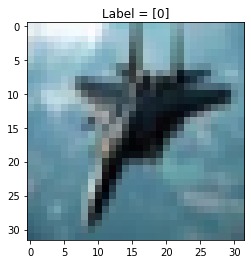

In [109]:
plt.imshow(x_val[0].reshape(32, 32, 3), cmap='gray_r')
plt.title(f'Label = {y_val[0]}')
plt.show()

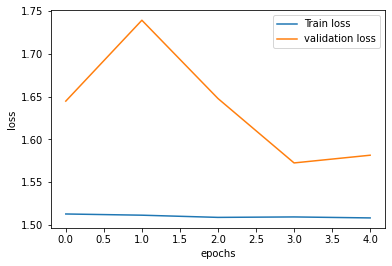

In [110]:
# loss 비교
plt.plot(result.epoch, result.history['loss'],label='Train loss')
plt.plot(result.epoch, result.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

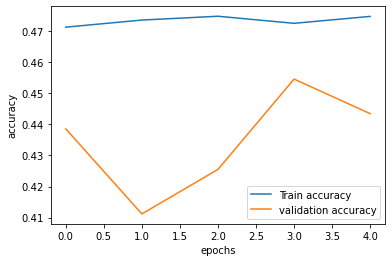

In [111]:
# accuracy 비교
plt.plot(result.epoch, result.history['accuracy'],label='Train accuracy')
plt.plot(result.epoch, result.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

---
## [4] 테스트 평가
- evaluate 메서드
- 테스트 데이터, 테스트 라벨

In [116]:
predict_y = model.predict(x_test[0].reshape(-1, 32, 32, 3))

1/1 [==============================] - 0s 24ms/step


In [117]:
predict_y.round(2), predict_y.shape

(array([[0.05, 0.03, 0.09, 0.1 , 0.01, 0.04, 0.13, 0.  , 0.55, 0.01]],
       dtype=float32),
 (1, 10))

In [118]:
y_test[0]

array([3], dtype=uint8)

In [119]:
# pilimg를 사용하여 이미지를 불러온다
import PIL.Image as pilimg
import numpy as np

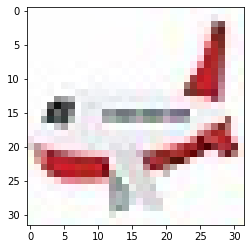

In [129]:
# 불러온 이미지를 matplot으로 나타내기 위해 numpy array로 만든다
# pilimg.open : 이미지를 불러온다.
# image.show() : 이미지를 띄운다.
# np.array(image) : 불러온 이미지를 Numpy Array로 만든다.
airplane = pilimg.open('airplane_image.jpg')
airplane.show()

pix=np.array(airplane)

plt.imshow(pix)

In [139]:
predict_airplane = model.predict(pix.reshape(-1, 32, 32, 3))
predict_airplane

1/1 [==============================] - 0s 57ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [142]:
# airplane
# automobile
# bird
# cat
# deer
# dog
# frog
# horse
# ship
# truck